In [1]:
!nvidia-smi

Mon Jun 12 00:22:01 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.6/599.6 kB 33.3 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO
from IPython.display import display, Image

WARNING  user config directory is not writeable, defaulting to '/tmp/Ultralytics'.


In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="vseJOmqn8ruWH2U0j6Rd")
project = rf.workspace("gabrielainteli").project("fire_detection-ihaqe")
dataset = project.version(2).download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.1 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.116, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Fire_Detection-2 in yolov8:: 100%|██████████| 11842/11842 [00:03<00:00, 3814.12it/s]


In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=10 imgsz=800 plots=True

/content
WARNING ⚠️ user config directory is not writeable, defaulting to '/tmp/Ultralytics'.
100% 21.5M/21.5M [00:00<00:00, 277MB/s]
Ultralytics YOLOv8.0.116 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Fire_Detection-2/data.yaml, epochs=10, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=Fal

In [7]:
!ls {HOME}/runs/detect/train/

args.yaml					    results.png
confusion_matrix_normalized.png			    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1686529481.a5180c516afd.1800.0  train_batch2.jpg
F1_curve.png					    val_batch0_labels.jpg
labels_correlogram.jpg				    val_batch0_pred.jpg
labels.jpg					    val_batch1_labels.jpg
P_curve.png					    val_batch1_pred.jpg
PR_curve.png					    val_batch2_labels.jpg
R_curve.png					    val_batch2_pred.jpg
results.csv					    weights


/content


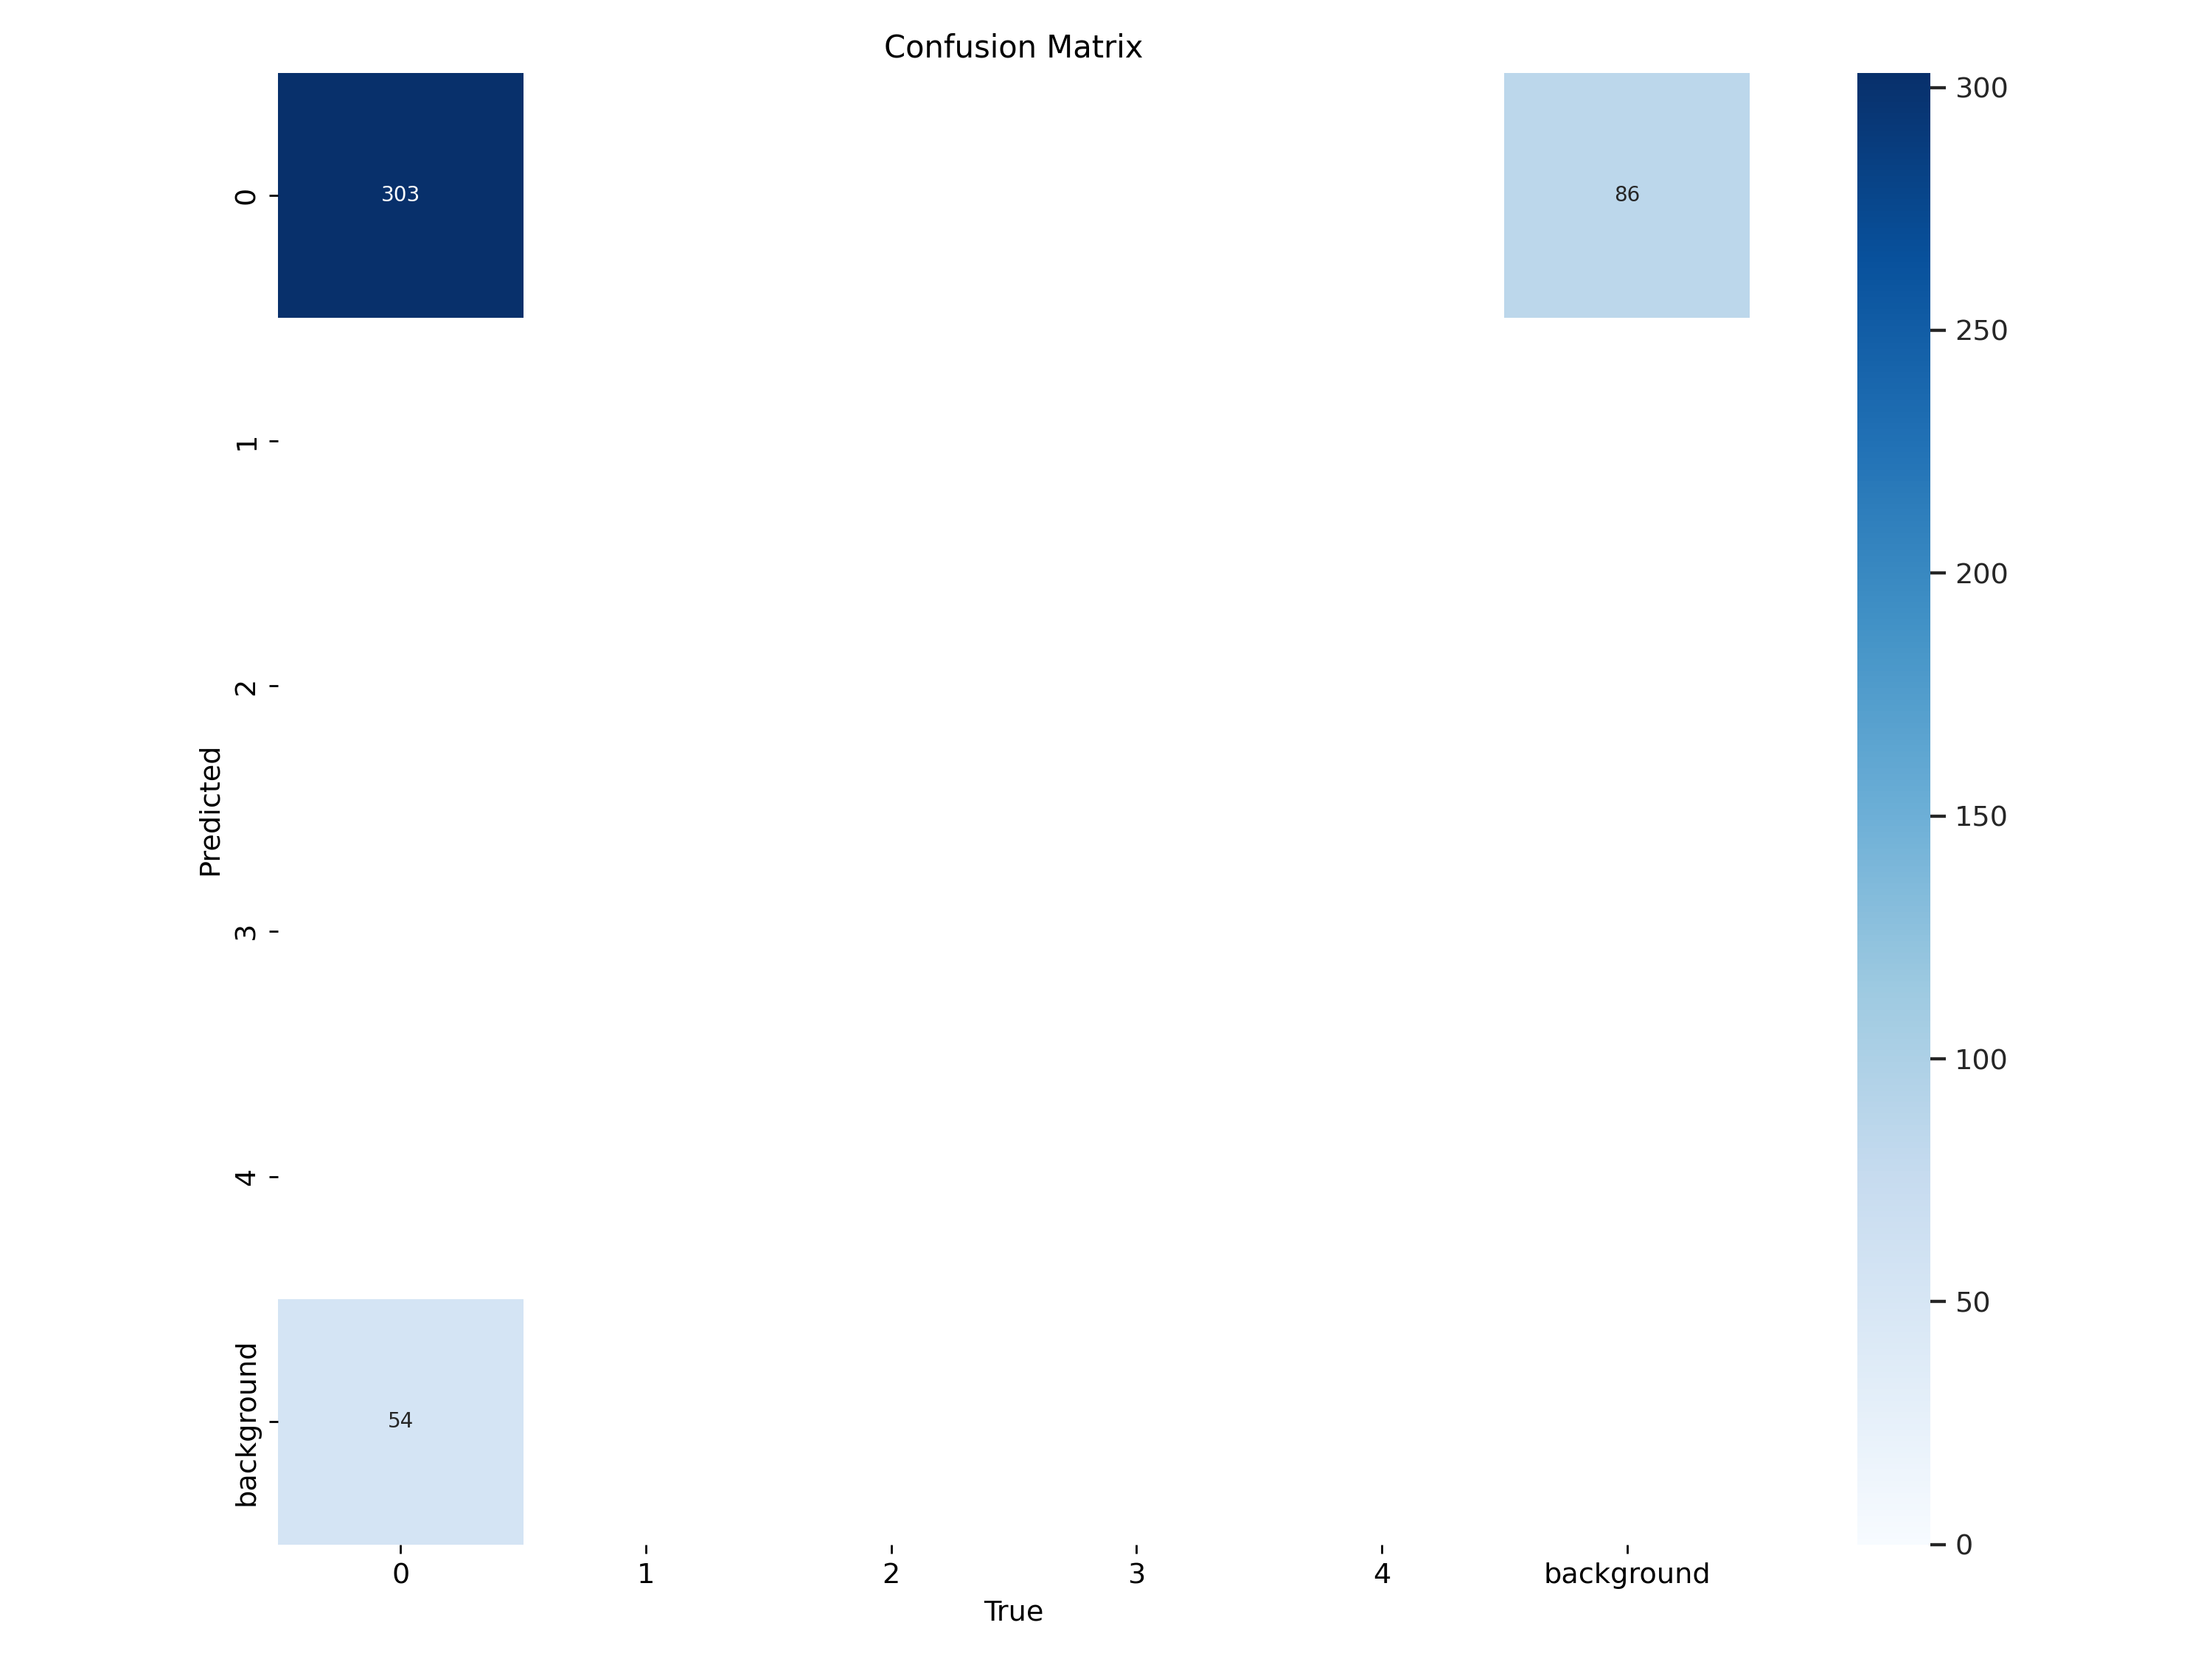

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


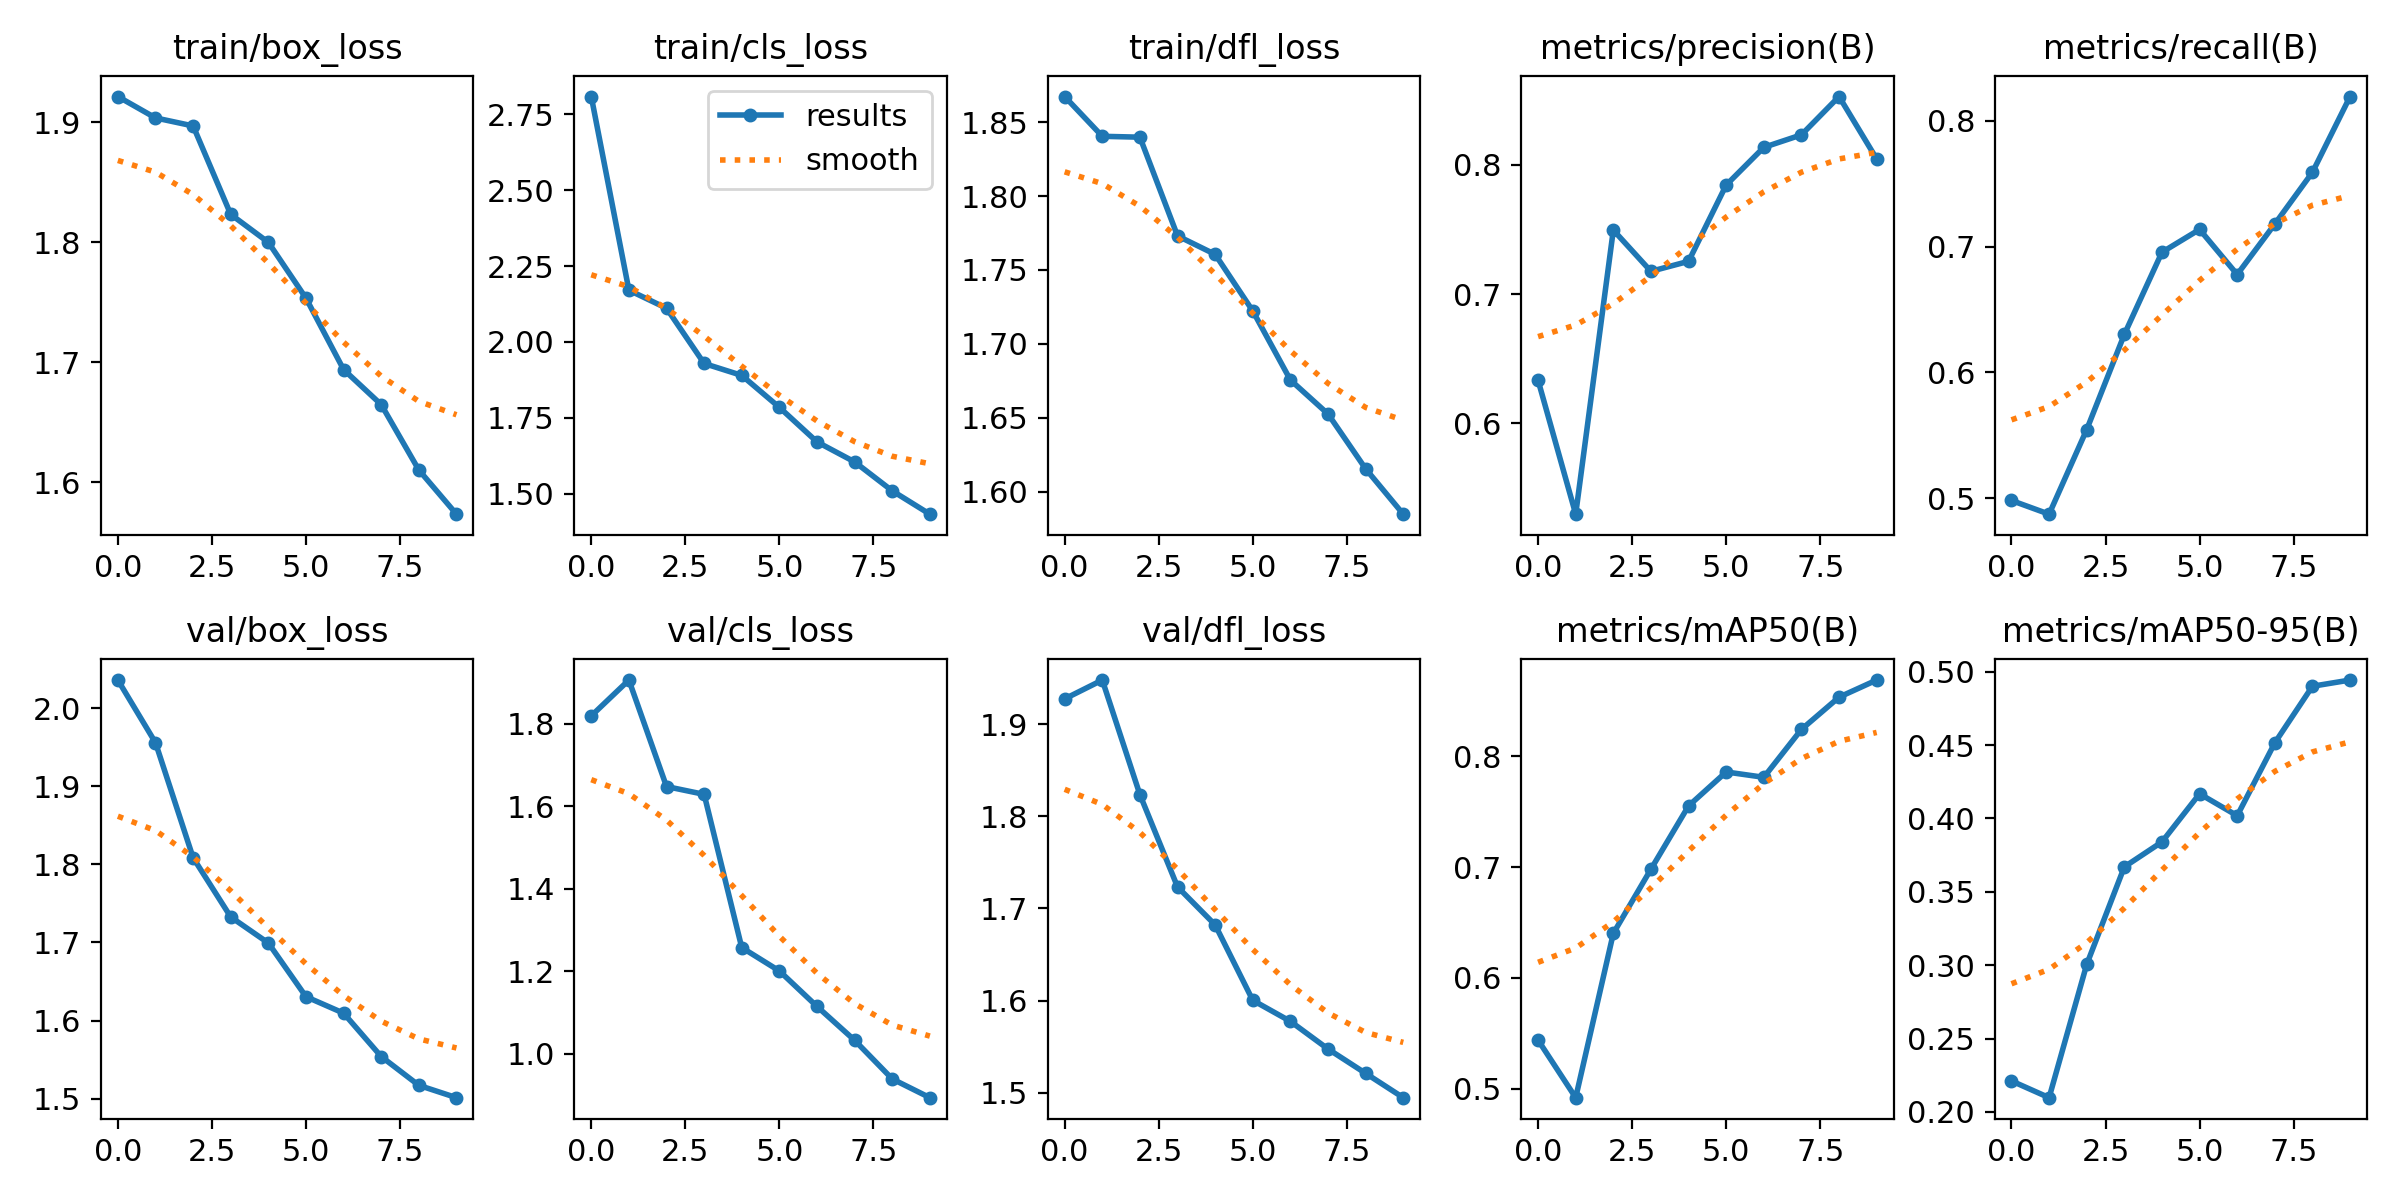

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


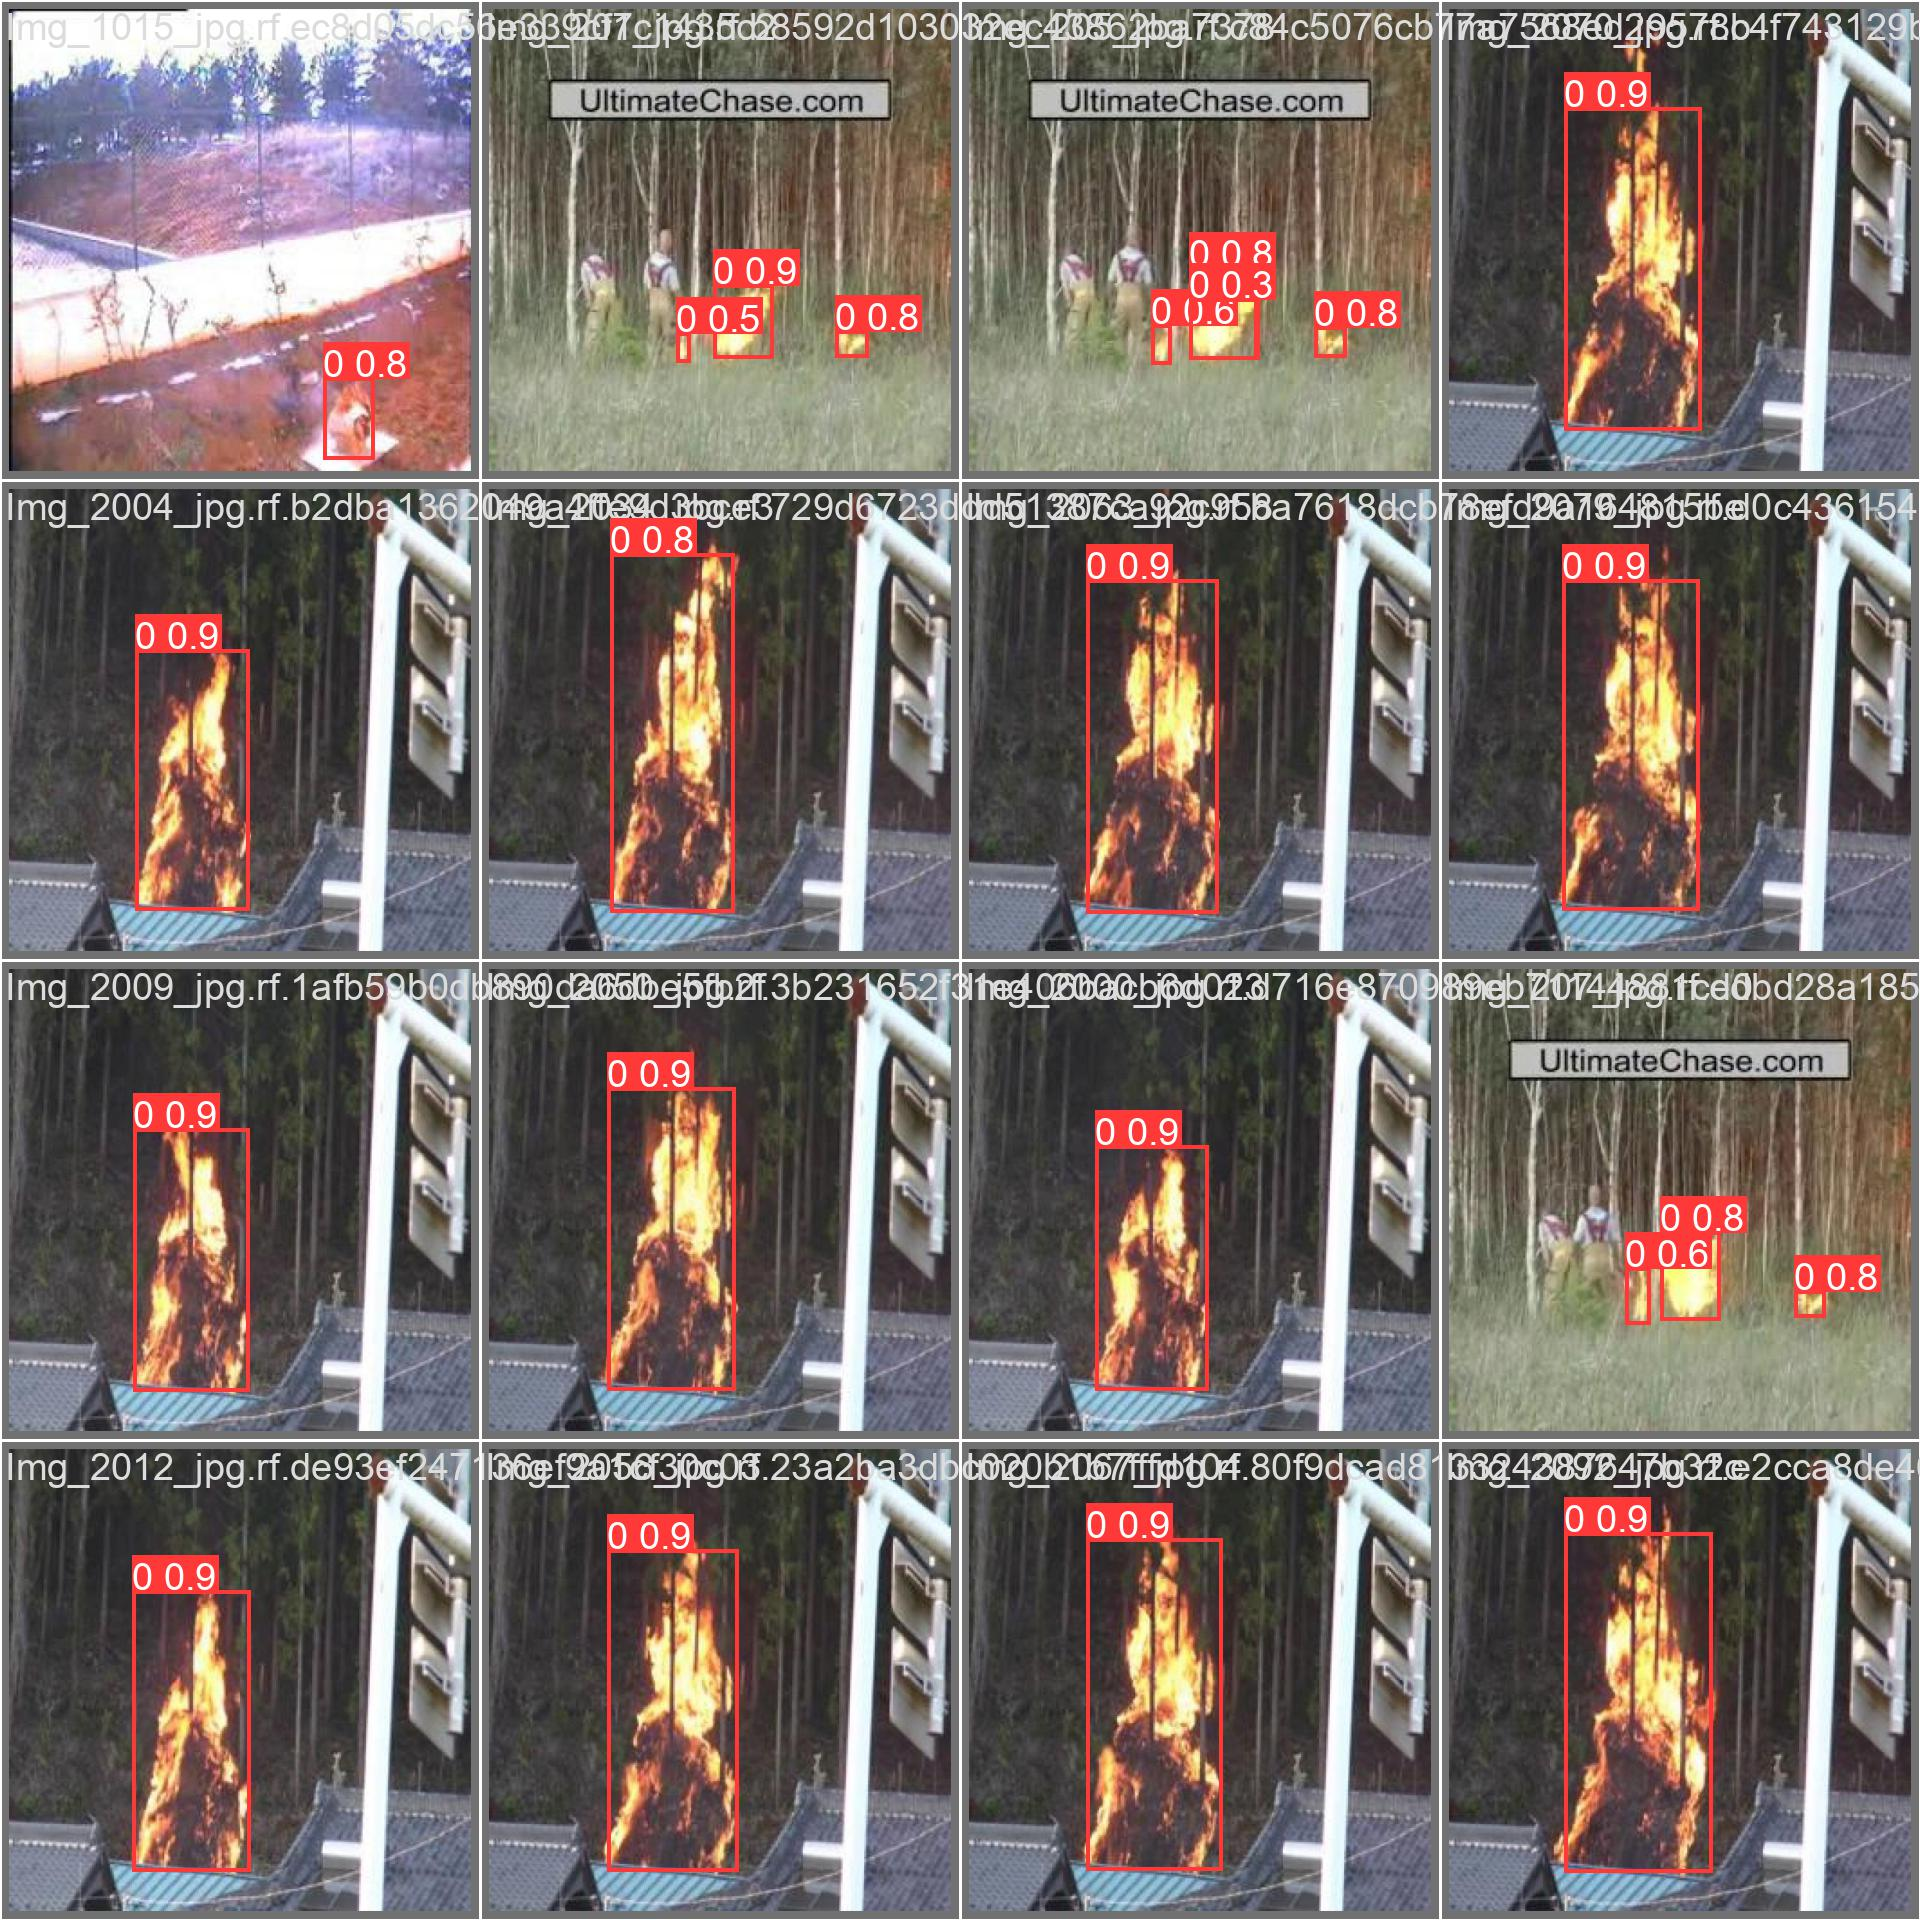

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [11]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.116 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients
100% 755k/755k [00:00<00:00, 142MB/s]
val: Scanning /content/datasets/Fire_Detection-2/valid/labels.cache... 192 images, 0 backgrounds, 0 corrupt: 100% 192/192 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 12/12 [00:07<00:00,  1.71it/s]
                   all        192        357      0.802      0.818      0.869      0.494
                     0        192        357      0.802      0.818      0.869      0.494
Speed: 2.5ms preprocess, 14.2ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/val


In [13]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.5 source={dataset.location}/test/images save=True

/content
WARNING ⚠️ user config directory is not writeable, defaulting to '/tmp/Ultralytics'.
Ultralytics YOLOv8.0.116 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients

image 1/100 /content/datasets/Fire_Detection-2/test/images/Img_1029_jpg.rf.3cf0653c75bdf6dece6b3c38bd2256a0.jpg: 800x800 1 0, 24.6ms
image 2/100 /content/datasets/Fire_Detection-2/test/images/Img_1047_jpg.rf.3ed9a360c328e6eeba906a4b3aa33db9.jpg: 800x800 1 0, 24.7ms
image 3/100 /content/datasets/Fire_Detection-2/test/images/Img_1052_jpg.rf.78b74245ced50ebd2368ee73d25d5542.jpg: 800x800 1 0, 24.6ms
image 4/100 /content/datasets/Fire_Detection-2/test/images/Img_1065_jpg.rf.159f51ddacced43600c14c460f981cf2.jpg: 800x800 1 0, 24.6ms
image 5/100 /content/datasets/Fire_Detection-2/test/images/Img_1074_jpg.rf.ba227f20d5b2765ae145b0852b4c9ba1.jpg: 800x800 1 0, 24.6ms
image 6/100 /content/datasets/Fire_Detection-2/test/images/Img_107_jpg.rf.77d642a7cb

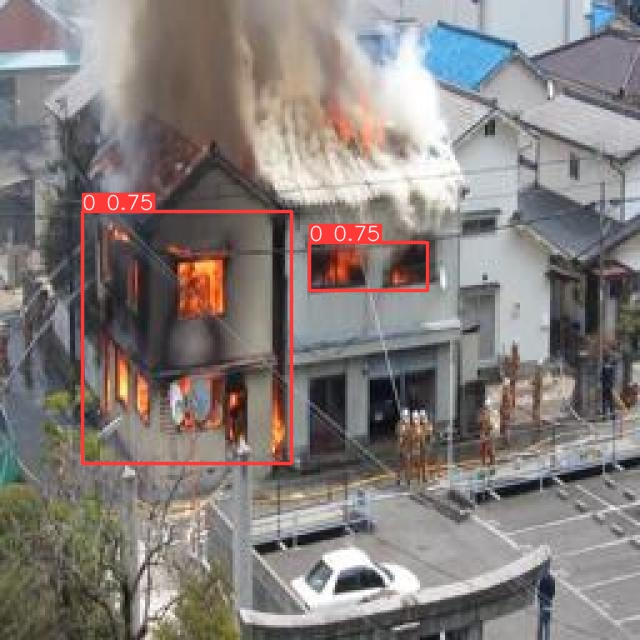

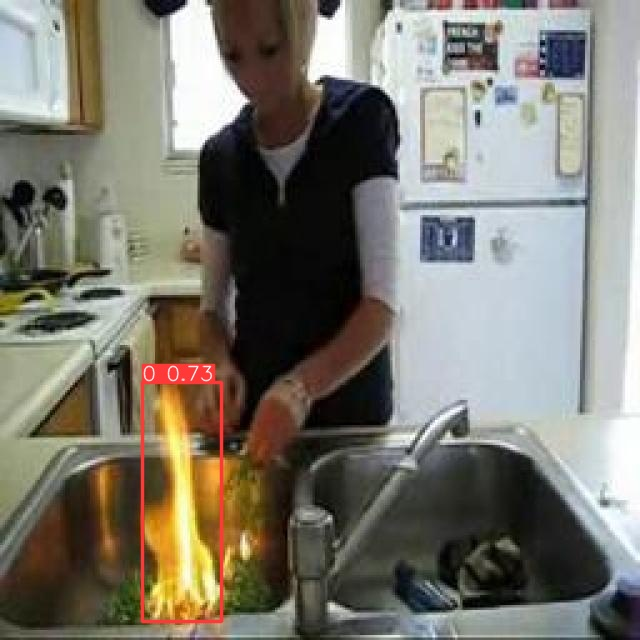

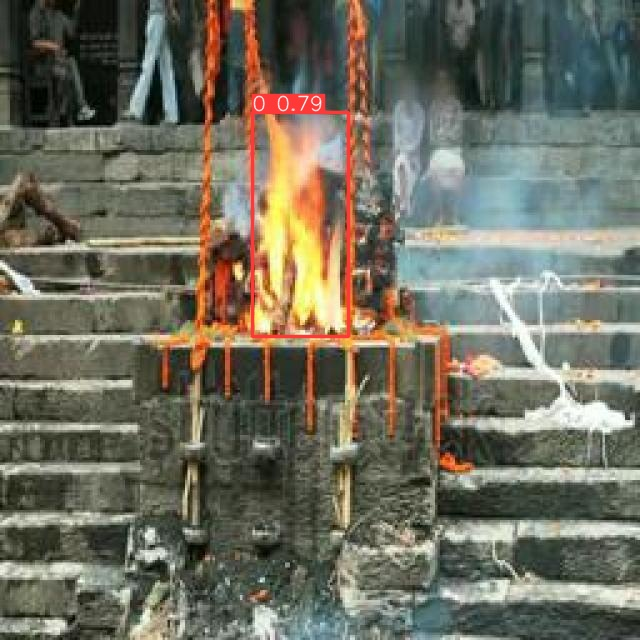

In [14]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")